# Zadanie 3

## Mateusz Kowalski

In [2]:
import numpy as np
import collections
from random import shuffle
from copy import deepcopy
import warnings
import matplotlib.pyplot as plt

## Cost function

In [3]:
def cost(table, solved):
    result = 0
    N = len(table)
    temp = np.zeros((9,9))
    counter = 0
    for i in range(N):
        for j in range(N):
            if table[i][j] == -1:
                temp[i][j] = solved[counter]
                counter += 1
            else:
                temp[i][j] = table[i][j]
    
    #columns
    for row in temp:
        result += N - len(np.unique(row))

    #row
    for i in range(N):
        result += N - len(np.unique(temp[:,i]))

    #squares
    for j in range(0,7,3):
        for i in range(0,7,3):
            result += N - len(np.unique(temp[i:i+3,j:j+3]))

    return result

## Swap function

In [4]:
def swap(path):
    swapped = deepcopy(path)
    n = len(path)

    a = np.random.randint(0,n-1)
    b = np.random.randint(0,n-1)
    while a == b:
        a = np.random.randint(0,n-1)
        b = np.random.randint(0,n-1)

    swapped[a], swapped[b] = swapped[b], swapped[a]
    return swapped

## Annealing

In [5]:
def annealing(table, solved, iterationLimit):
    with warnings.catch_warnings():
        warnings.simplefilter('ignore') 
        T = 0.5
        Ts = [T]
        costs = [cost(table, solved)]
        noChangesCounter = 0
        iterationCounter = 0
        for _ in range(iterationLimit):
            prev_cost = cost(table, solved)
            swapped = swap(solved)
            if cost(table, swapped) <= cost(table, solved):
                solved = swapped
                noChangesCounter = 0
            else:
                if np.random.uniform(0,1) < np.exp((cost(table,solved) - cost(table,swapped)/T)):
                    solved = swapped
                    noChangesCounter = 0
                else:
                    noChangesCounter += 1
            T *= 0.999
            if noChangesCounter == 50:
                T += 0.4 * T
                noChangesCounter = 0
            
            Ts.append(T)
            costs.append(cost(table, solved))
            iterationCounter += 1
            
            if cost(table, solved) == 0:
                break
            

        return solved, Ts, costs, iterationCounter

## Read File

In [6]:
def readFile(fileName):
    table = np.empty((9,9),int)
    solved = []
    with open(fileName,"r") as f:
        text = f.read().split("\n")
        text = text[:-1]
        for row,line in enumerate(text):
            chars = line.split(" ")
            for col in range(len(chars)):
                table[row][col] = int(chars[col])
    
    count0 = 0
    counter = [0 for i in range(10)]
    for i in table:
        for j in i:
            if j == -1:
                continue
            counter[j] += 1
    
    for i in range(1, 10):
        for j in range(9-counter[i]):
            solved.append(i)
    
    shuffle(solved)
    return table, np.array(solved)

## Solve function

In [7]:
def solve(fileName, iterationLimit):
    table, solved = readFile(fileName)
    solved, Ts, costs, iterationCounter = annealing(table, solved, iterationLimit)
    
    X = [i for i in range(1, len(Ts) + 1)]
    
    print("Number of empty cells: ", len(solved))
    if iterationCounter == iterationLimit:
        print("Reached max iteration number! :(")
    print("Number of iterations: ", iterationCounter)
    print("Final cost: ", costs[len(costs) - 1])
    
    plt.plot(X, Ts)
    plt.title("Temperature")
    plt.show()
    
    plt.plot(X, costs)
    plt.title("Cost")
    plt.show()

Number of empty cells:  59
Reached max iteration number! :(
Number of iterations:  50000
Final cost:  2


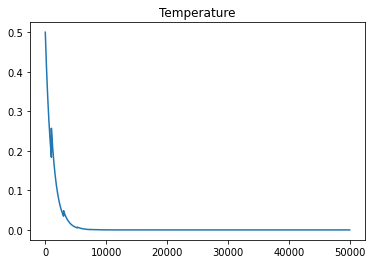

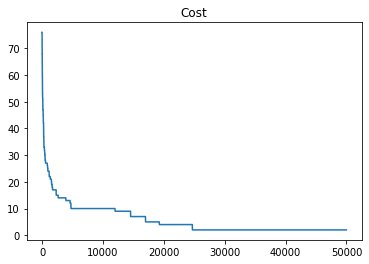

In [8]:
solve("sudoku.txt", 50000)

Number of empty cells:  49
Reached max iteration number! :(
Number of iterations:  50000
Final cost:  4


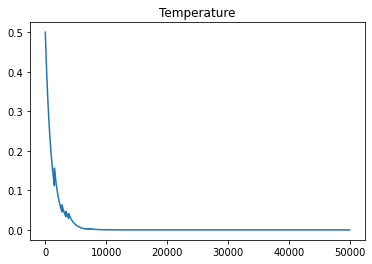

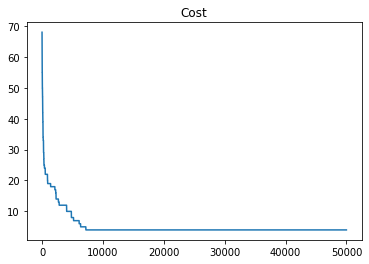

In [9]:
solve("sudoku2.txt", 50000)